In [92]:
import matplotlib.pyplot as plt
import numpy as np
from src.SEIR.seir_model import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


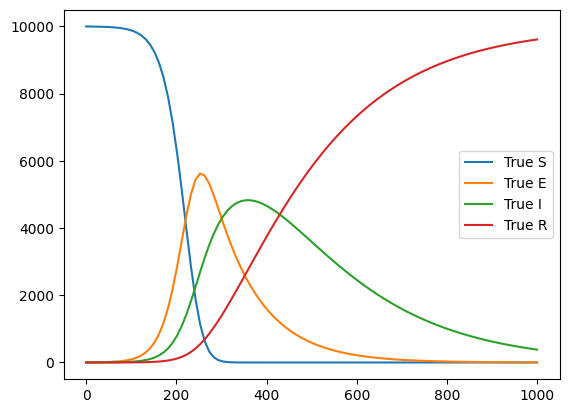

In [93]:
t = np.linspace(0, 1000, 100)

S, E, I, R = simulate_seir(t)
plot_seir(S, E, I, R, t)

Initial Values
initial alpha: 3e-05initial sigma: 0.03initial gamma: 0.003initial S0: 8000initial E0: 2
                            SEIR OPTIMIZATION RESULTS                             
Iterations: 77 | Final L2 Parameter Cost: 30730.455844

--- ALPHA ---
True:      2e-05
Initial:   3e-05
Estimated: 1.92674832215651e-05
Error (%): 3.6626%

--- SIGMA ---
True:      0.01
Initial:   0.03
Estimated: 0.010421928157296615
Error (%): 4.2193%

--- GAMMA ---
True:      0.005
Initial:   0.003
Estimated: 0.004906063557455214
Error (%): 1.8787%

--- S0 ---
True:      9999
Initial:   8000
Estimated: 9824.330787836454
Error (%): 1.7469%

--- E0 ---
True:      0
Initial:   2
Estimated: 14.870177082809445
Error (%): nan%


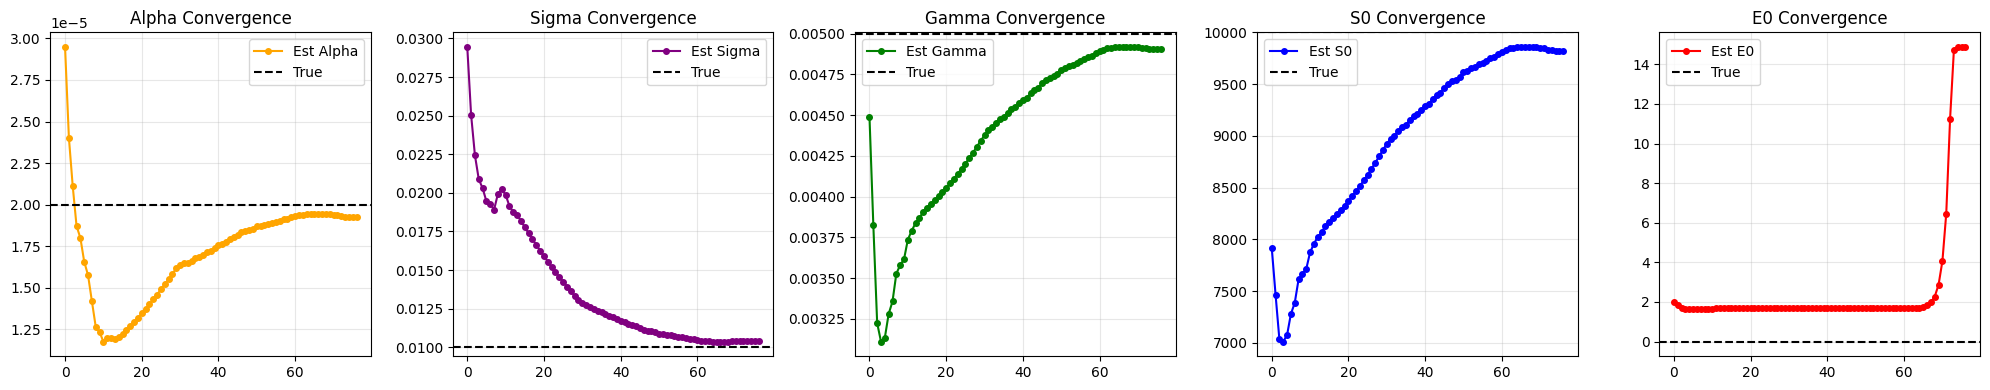

In [110]:
I_data = I + np.random.normal(0, 0.01 * I, size=I.shape)

# initial guess
alpha0 = 0.00003
sigma0 = 0.03
gamma0 = 0.007
S00 = 8000
E00 = 2

# plot initial values
print(f"Initial Values\n"
      f"initial alpha: {alpha0}"
      f"initial sigma: {sigma0}"
      f"initial gamma: {gamma0}"
      f"initial S0: {S00}"
      f"initial E0: {E00}")

result = run_experiments(alpha0, sigma0, gamma0, S00, E00, I_data, t)
print_results(result)
plot_results(result)

## Noise Level Analysis

In [ ]:
noise_steps = 41
noise_levels = [0.005 * i for i in range(noise_steps)]  # 0% to 20%
x_noise_percent = [0.5 * i for i in range(noise_steps)]

# initial guess
alpha0 = 0.00003
sigma0 = 0.03
gamma0 = 0.007
S00 = 8000
E00 = 2
x0 = [alpha0, sigma0, gamma0, S00, E00]

num_of_iterations = 20

results = {
    "alpha": {"mean": [], "std": []},
    "sigma": {"mean": [], "std": []},
    "gamma": {"mean": [], "std": []},
    "S0":    {"mean": [], "std": []},
    "E0":    {"mean": [], "std": []}
}

for noise in noise_levels:
    param_samples = {k: [] for k in results.keys()}
    for _ in range(num_of_iterations):
        I_data = I + np.random.normal(0, noise * I, size=I.shape)
        B1, B2, B3, B4, B5, B6 = get_blocks(I_data, t)

        res = least_squares(residual, x0, args=(I_data, B1, B2, B3, B4, B5, B6, t), bounds=(0, np.inf), x_scale=scales)

        param_samples["alpha"].append(res.x[0])
        param_samples["sigma"].append(res.x[1])
        param_samples["gamma"].append(res.x[2])
        param_samples["S0"].append(res.x[3])
        param_samples["E0"].append(res.x[4])

    for p in results:
        results[p]["mean"].append(np.mean(param_samples[p]))
        results[p]["std"].append(np.std(param_samples[p]))

# Plot 5 subplots
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
params = ["alpha", "sigma", "gamma", "S0", "E0"]
true_values = [alpha, sigma, gamma, S0, E0]

for i, param in enumerate(params):
    ax = axes[i]
    means = np.array(results[param]["mean"])
    stds = np.array(results[param]["std"])

    # Plot Mean
    ax.plot(x_noise_percent, means, label=f"Estimated {param}", color="blue", marker="o", markersize=3)

    # Plot True Value
    ax.axhline(y=true_values[i], label=f"True {param}", color="orange", linestyle="--", linewidth=2)

    # Plot Standard Deviation
    ax.fill_between(x_noise_percent, means - stds, means + stds, color="blue", alpha=0.2, label="Std Dev")

    ax.set_title(f"Robustness of {param}")
    ax.set_xlabel("Noise Level (% of max I)")
    ax.set_ylabel("Parameter Value")
    fig.patch.set_facecolor("white")
    ax.set_facecolor("white")
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.show()

## Number of Datapoints

In [ ]:
num_of_data_points = [1 * i for i in range(50, 201, 5)]

# initial guess
alpha0 = 0.00003
sigma0 = 0.03
gamma0 = 0.007
S00 = 8000
E00 = 2
x0 = [alpha0, sigma0, gamma0, S00, E00]

num_of_iterations = 20

results = {
    "alpha": {"mean": [], "std": []},
    "sigma": {"mean": [], "std": []},
    "gamma": {"mean": [], "std": []},
    "S0":    {"mean": [], "std": []},
    "E0":    {"mean": [], "std": []}
}

for steps in num_of_data_points:
    t = np.linspace(0, 1000, steps)
    S, E, I, R = simulate_seir(t)

    param_samples = {k: [] for k in results.keys()}
    for _ in range(num_of_iterations):
        I_data = I + np.random.normal(0, 0.01 * I, size=I.shape)
        B1, B2, B3, B4, B5, B6 = get_blocks(I_data, t)

        res = least_squares(residual, x0, args=(I_data, B1, B2, B3, B4, B5, B6, t), bounds=(0, np.inf), x_scale=scales)

        param_samples["alpha"].append(res.x[0])
        param_samples["sigma"].append(res.x[1])
        param_samples["gamma"].append(res.x[2])
        param_samples["S0"].append(res.x[3])
        param_samples["E0"].append(res.x[4])

    for p in results:
        results[p]["mean"].append(np.mean(param_samples[p]))
        results[p]["std"].append(np.std(param_samples[p]))

# plot
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
params = ["alpha", "sigma", "gamma", "S0", "E0"]
true_values = [alpha, sigma, gamma, S0, E0]

for i, param in enumerate(params):
    ax = axes[i]
    means = np.array(results[param]["mean"])
    stds = np.array(results[param]["std"])

    # Plot Mean
    ax.plot(num_of_data_points, means, label=f"Est. {param}", color="green", marker="o", markersize=3)

    # Plot True Value
    ax.axhline(y=true_values[i], label=f"True {param}", color="orange", linestyle="--", linewidth=2)

    # Plot Standard Deviation
    ax.fill_between(num_of_data_points, means - stds, means + stds, color="green", alpha=0.2, label="Std Dev")

    ax.set_title(f"Robustness of {param}")
    ax.set_xlabel("Number of Data Points")
    ax.set_ylabel("Parameter Value")
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Simulate S and E

In [114]:
I_data = I + np.random.normal(0, 0.01 * I, size=I.shape)

# initial guess
alpha0 = 0.00003
sigma0 = 0.03
gamma0 = 0.007
S00 = 8000
E00 = 2
x0 = [alpha0, sigma0, gamma0, S00, E00]

B1, B2, B3, B4, B5, B6 = get_blocks(I_data, t)
res = least_squares(residual, x0, args=(I_data, B1, B2, B3, B4, B5, B6, t), bounds=(0, np.inf), x_scale=scales)
alpha_hat, sigma_hat, gamma_hat, S0_hat, E0_hat = tuple(res.x)

# from the relationship equation
S_hat = np.zeros_like(t)
E_hat = np.zeros_like(t)

# from numerical integration
solution_hat = scipy.integrate.odeint(SEIR, [S0_hat, E0_hat, I_data[0], R0], t, args=(alpha_hat, sigma_hat, gamma_hat))
S_hat_2 = solution_hat.T[0]
E_hat_2 = solution_hat.T[1]

# relative percentage error
S_hat_error = (S_hat - S) / S * 100
S_hat_2_error = (S_hat_2 - S) / S * 100

eps = 1e-10  # avoid /0
E_hat_error = (E_hat - E) / (E + eps) * 100
E_hat_2_error = (E_hat_2 - E) / (E + eps) * 100

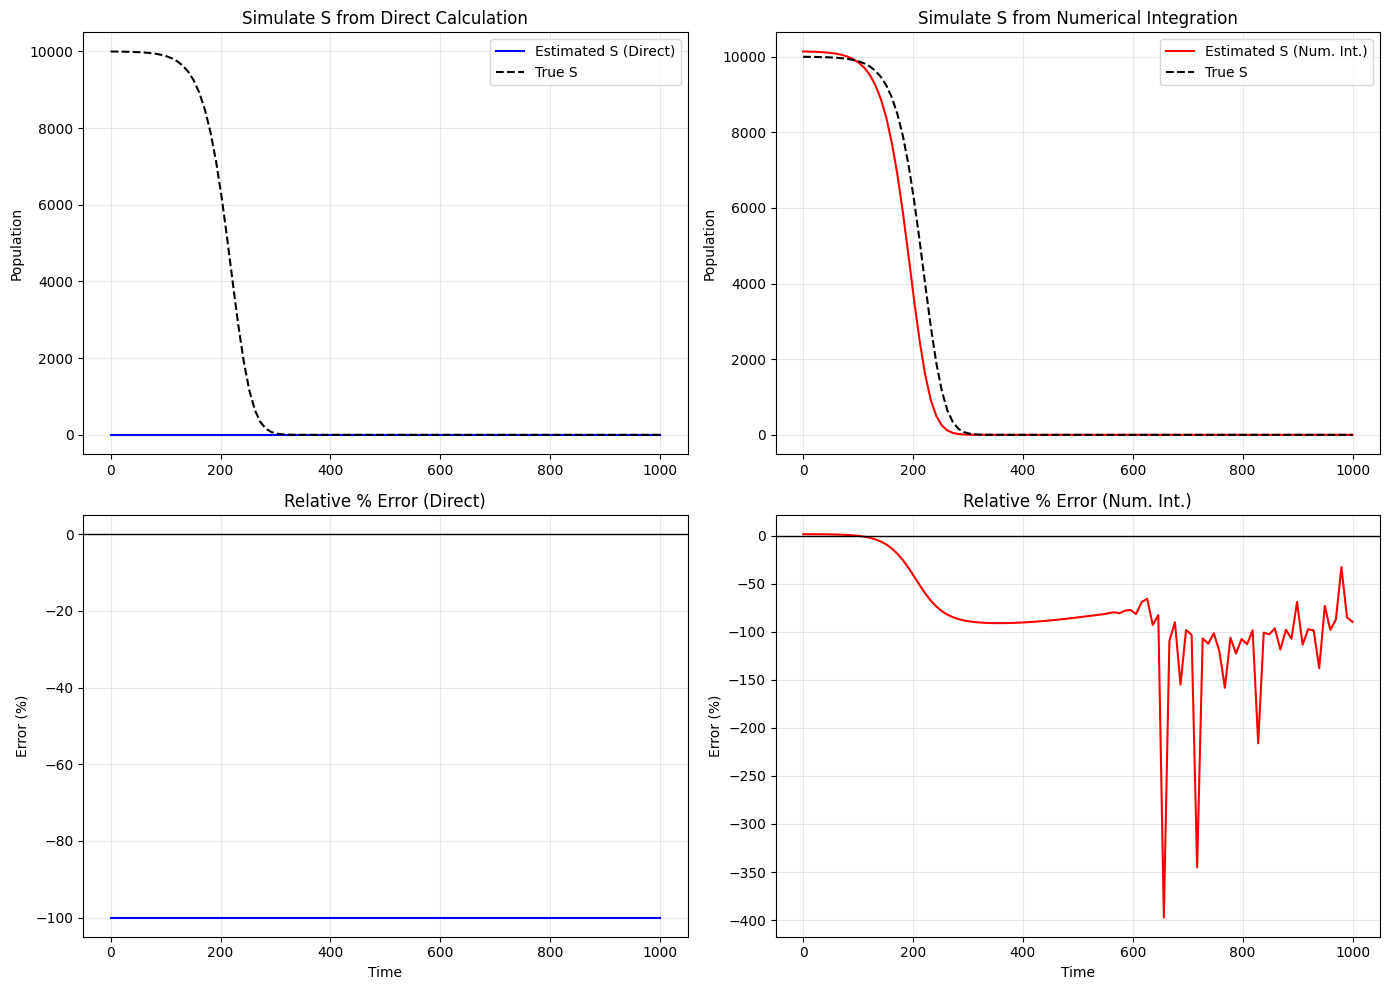

In [115]:
# Simulation of S plot
# first row: Direct calculation of S , Numerical integration of S
# second row: Relative percentage error of S from direct cal, Relative percentage error of S from numerical integration

fig, axes = plt.subplots(2, 2, figsize=(14, 10))


# --- Plot 1-1: Direct Calculation (Population) ---
axes[0, 0].plot(t, S_hat, label="Estimated S (Direct)", color='blue')
axes[0, 0].plot(t, S, label="True S", color='black', linestyle='--')
axes[0, 0].set_title("Simulate S from Direct Calculation")
axes[0, 0].set_ylabel("Population")
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# --- Plot 1-2: Numerical Integration (Population) ---
axes[0, 1].plot(t, S_hat_2, label="Estimated S (Num. Int.)", color='red')
axes[0, 1].plot(t, S, label="True S", color='black', linestyle='--')
axes[0, 1].set_title("Simulate S from Numerical Integration")
axes[0, 1].set_ylabel("Population")
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# --- Plot 2-1: Relative Error (Direct Calculation) ---
axes[1, 0].plot(t, S_hat_error, color='blue', label="Error %")
axes[1, 0].axhline(0, color='black', linewidth=1)
axes[1, 0].set_title("Relative % Error (Direct)")
axes[1, 0].set_xlabel("Time")
axes[1, 0].set_ylabel("Error (%)")
axes[1, 0].grid(True, alpha=0.3)

# --- Plot 2-2: Relative Error (Numerical Integration) ---
axes[1, 1].plot(t, S_hat_2_error, color='red', label="Error %")
axes[1, 1].axhline(0, color='black', linewidth=1)
axes[1, 1].set_title("Relative % Error (Num. Int.)")
axes[1, 1].set_xlabel("Time")
axes[1, 1].set_ylabel("Error (%)")
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

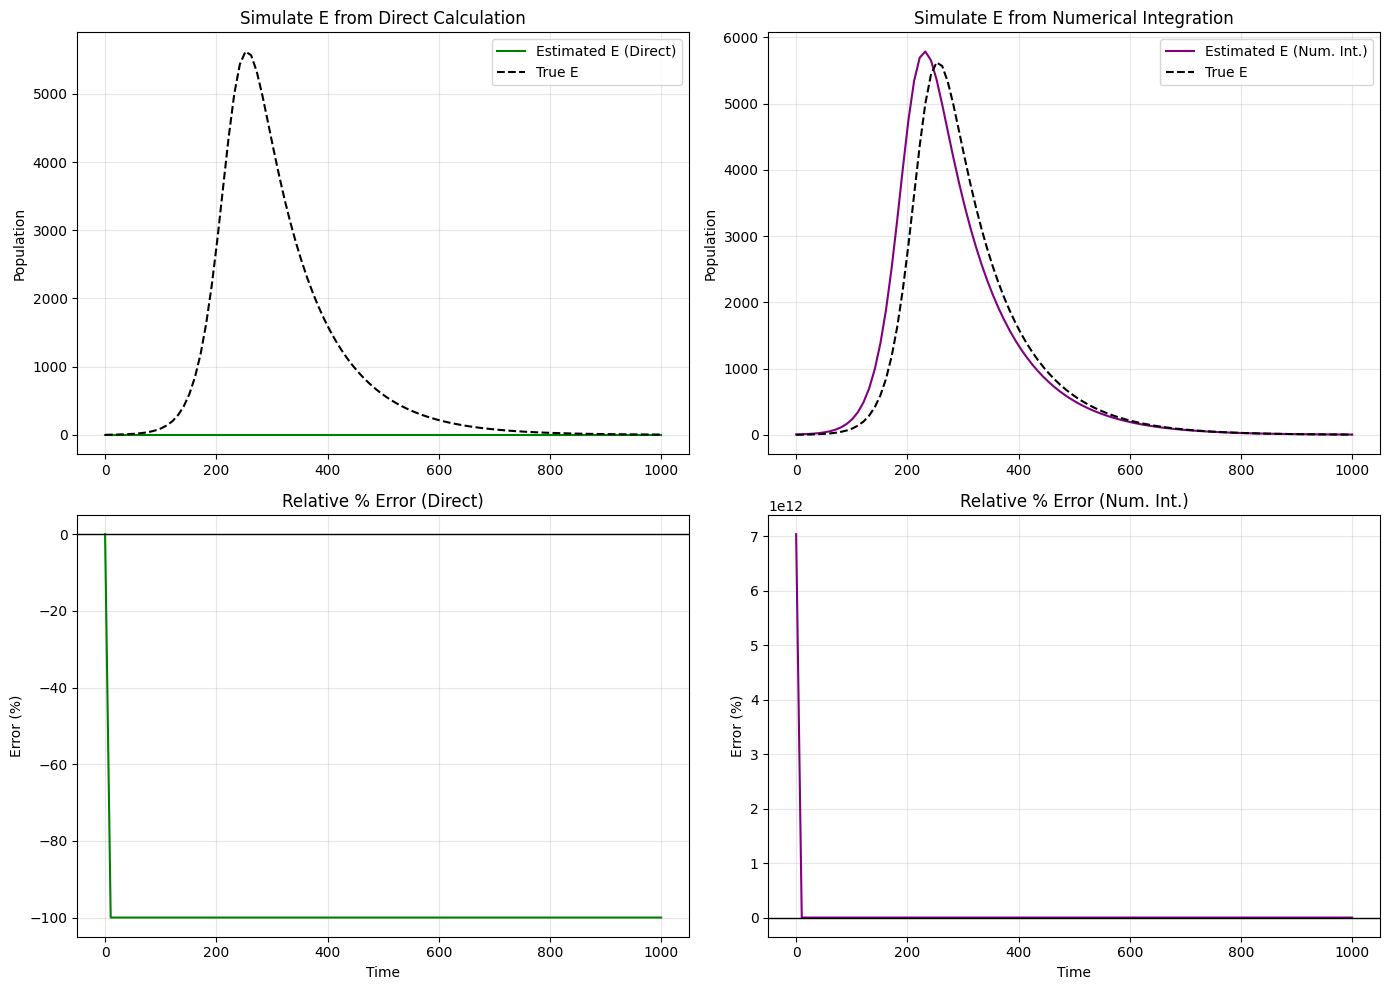

In [116]:
# Simulation of E plot
# first row: Direct calculation of S , Numerical integration of S
# second row: Relative percentage error of S from direct cal, Relative percentage error of S from numerical integration

fig, axes = plt.subplots(2, 2, figsize=(14, 10))


# --- Plot 1-1: Direct Calculation (Population) ---
axes[0, 0].plot(t, E_hat, label="Estimated E (Direct)", color='green')
axes[0, 0].plot(t, E, label="True E", color='black', linestyle='--')
axes[0, 0].set_title("Simulate E from Direct Calculation")
axes[0, 0].set_ylabel("Population")
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# --- Plot 1-2: Numerical Integration (Population) ---
axes[0, 1].plot(t, E_hat_2, label="Estimated E (Num. Int.)", color='purple')
axes[0, 1].plot(t, E, label="True E", color='black', linestyle='--')
axes[0, 1].set_title("Simulate E from Numerical Integration")
axes[0, 1].set_ylabel("Population")
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# --- Plot 2-1: Relative % Error (Direct) ---
axes[1, 0].plot(t, E_hat_error, color='green', label="Error %")
axes[1, 0].axhline(0, color='black', linewidth=1)
axes[1, 0].set_title("Relative % Error (Direct)")
axes[1, 0].set_xlabel("Time")
axes[1, 0].set_ylabel("Error (%)")
axes[1, 0].grid(True, alpha=0.3)

# --- Plot 2-2: Relative % Error (Num. Int.) ---
axes[1, 1].plot(t, E_hat_2_error, color='purple', label="Error %")
axes[1, 1].axhline(0, color='black', linewidth=1)
axes[1, 1].set_title("Relative % Error (Num. Int.)")
axes[1, 1].set_xlabel("Time")
axes[1, 1].set_ylabel("Error (%)")
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()